# Bohr models of ions

The Bohr model works for atoms with only one electron. Adding electrons would require accounting for their mutual Coulomb forces, which would depend on the electrons' locations in their orbits. However, there are ions that have only one electron, for which a small modification to the Bohr model can predict their energy levels.

Read the notebook <tt>Bohr_model_extensions.ipynb</tt>, which is on the class GitHub page. You will be using Equation 1 to compare the photon energy that correspond to energy level transitions in hydrogen, singly-ionized helium, and doubly-ionized lithium.

Note: you are responsible for importing the packages you need and making sure your axis labels are large enough to be readable.

<ol>
    <li>Write a function that finds the photon <em>energy</em> in eV (calculate it from the wavelength predicted by the Rydberg equation) that moves an electron between levels $n$ and $n+1$. The independent variables of your function should be $Z$ (atomic number) and $n$. Do not hand-code any constants: use the pre-programmed values in <tt>scipy</tt>.</li>
</ol>

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

def photon_eV(Z,n):
    # Formula to find photon energy from wavelength is E = (hc)/wavelength where h is Plancks constant
    # c is the speed of light and wavelength is the wavelength as calculated from the Rydberg equation
    
    # Calculating wavelength
    # Rydberg equation is (1/wavelength) = Rydberg Constant(1/n1^2-1/n2^2) where in our case n1 is n and n2 is n+1
    # Rearranging the equation to solve for wavelength we get
    wavelength = 1/(constants.Rydberg*Z**2*((1/n**2)-(1/(n+1)**2)))
    
    # Plugging the wavelegnth equation in the photon energy equation we get, this is in Joules
    photon_energy = (constants.Planck*constants.speed_of_light)/wavelength
    
    # Converting photon energy in Joules to electron volts multiply by 6.24*10^18 (Joules times eV/Joule = eV)
    eV = photon_energy*(6.241509074*10**18)
    
    return eV



<ol start = 2>
    <li>Use the python function of your choice to create an integer <em>array</em> (not list) of values $n = 1, 2, \ldots, 10$. Do not simply hard-code in all the numbers by hand. Create a second array (not list) of atomic numbers $Z = 1, 2, 3$, again using a python function.</li>
</ol>

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Array for n values from 1 to 10
n = np.arange(1,11)

# Array for Z values from 1 to 3
Z = np.arange(1,4)

print(n)
print(Z)

# Note python indexes to x - 1 which is why the second number in the np.arange function is 11 
# So the np.arange function will index to 11-1 = 10 for n values
# And the np.arange function will index to 4-1=3 for Z values


[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]


<ol start=3>
    <li>For each combination of $Z$ and $n$, calculate the energy of light required to move from level $n$ to $n+1$. Store the results in an array with 3 rows and 10 columns. You may find the meshgrid command helpful.</li>
</ol>

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Array for n values from 1 to 10
n = np.arange(1,11)

# Array for Z values from 1 to 3
Z = np.arange(1,4)

Zv,nv = np.meshgrid(Z,n)
# Your code here

# Create an array of size 3 rows 10 columns with values of 0
ev_array = np.zeros((3,10))

# Energy of light function was already defined in problem 1 so no need to rewrite
# n and Z values already defined from problem 2 so no need to rewrite
# Populating the array, for loop will loop through each array position and fill that array position 
# with the associated photon energy value, i.e [1,1] of the array is photon_eV(1,1)

for i in range(3):
    for j in range(10):
        # print("i:", i, "j:", j), checked values for iterating through array because was having trouble with repeating values
        # issue was in problem 1 not multipying the rydberg constats by Z^2
        Z_value = Zv[j,i] # Current value for Z while iterating through array
        n_value = nv[j,i] # Current value for n while iterating through array
        ev_array[i,j] = photon_eV(Z_value,n_value)
        # print(Z_value,n_value)
        
print(ev_array)
        

                    

[[1.02042698e+01 1.88967960e+00 6.61387860e-01 3.06128095e-01
  1.66291805e-01 1.00268713e-01 6.50782515e-02 4.46174350e-02
  3.19145888e-02 2.36131864e-02]
 [4.08170794e+01 7.55871840e+00 2.64555144e+00 1.22451238e+00
  6.65167219e-01 4.01074854e-01 2.60313006e-01 1.78469740e-01
  1.27658355e-01 9.44527456e-02]
 [9.18384286e+01 1.70071164e+01 5.95249074e+00 2.75515286e+00
  1.49662624e+00 9.02418421e-01 5.85704264e-01 4.01556915e-01
  2.87231299e-01 2.12518678e-01]]


<ol start=4>
    <li>Now you are going to make a color-coded plot. With $n$ on the x-axis and $z$ on the y-axis, add a circle to your plot at each $(n,z)$ ordered pair with the color determined by the energy calculated in question 3. Make sure your plot has a colorbar to show the energy scale, and put units on the colorbar. x and y axes should also be labeled.</li>
</ol>

I am including an example plot showing arbitrary dependent variable $w$ on a color scale as a function of independent variables $u$ and $v$. None of these variables mean anything; this example is just to help you visualize what your plot should look like.

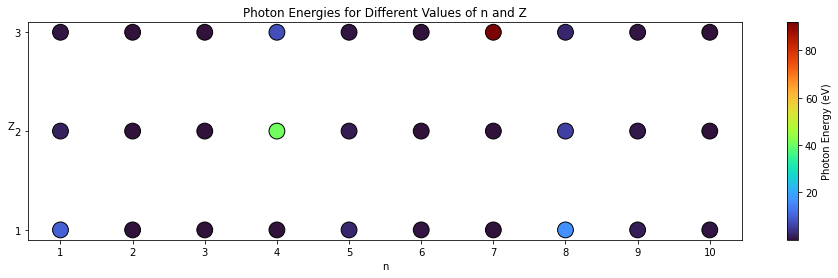

In [234]:
#from PIL import Image
#sample = Image.open("color_coded_scatter_example.png")
#display(sample)

plt.figure(figsize=(16, 4))
plt.scatter(nv, Zv, c=ev_array, cmap='turbo', s=250, edgecolors='black')
plt.xticks(ticks=n)
plt.yticks(ticks=Z)
plt.colorbar(label='Photon Energy (eV)')
plt.xlabel('n')
plt.ylabel('Z', rotation = 0)
plt.title('Photon Energies for Different Values of n and Z')
plt.grid(False)
plt.show()

Code that might help you make your plot is in the cell below. You are free to do something else if you prefer.

In [235]:
#from mpl_toolkits.axes_grid1 import make_axes_locatable

#fig, ax = plt.subplots(1, 1, figsize=(6,6))
#plot1 = ax.scatter(nv, Zv, ...) # Look up how to make a color-coded scatter plot
#ax.set_aspect('equal')

# Create a colorbar axis on the right side of ax. The width of cax will be 8%
# of ax and the padding between cax and ax will be fixed at 0.1 inch.
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="8%", pad=0.1)
#cbar = plt.colorbar(plot1, cax=cax)
#cbar.ax.tick_params(labelsize=12) 
#cbar.set_label('...')